In [8]:
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt

from descent_methods import GD, SGD, SGD_adagrad, SGD_RMS_prop, SGD_adam
from utilities import MSELoss_method, jax_loss_grad, feature_matrix

In [9]:
# simple function
def f(x):
    return 1 + x + x**2


In [10]:

num_points = 100
num_params = 7


x = np.random.random((num_points, 1))
y = f(x)
beta0 = {"W1":np.random.random((num_params, 1))}

X = feature_matrix(x, num_params)


def model(beta, X):
    return jnp.dot(X, beta["W1"])

loss_func = MSELoss_method(model)

loss_grad = jax_loss_grad(loss_func)


### Plain GD

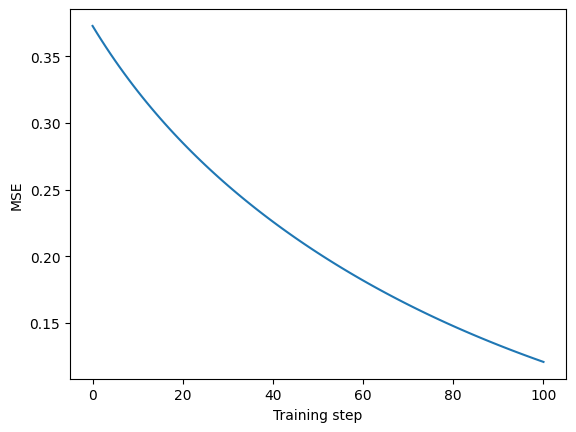

In [11]:

result_sgd = GD(grad_method=loss_grad, X=X, y=y, beta0=beta0, n_epochs=100, test_loss_func=loss_func, lr=0.01, gamma=0.0)

loss_list = result_sgd["loss_list"]


plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

### Stochastic

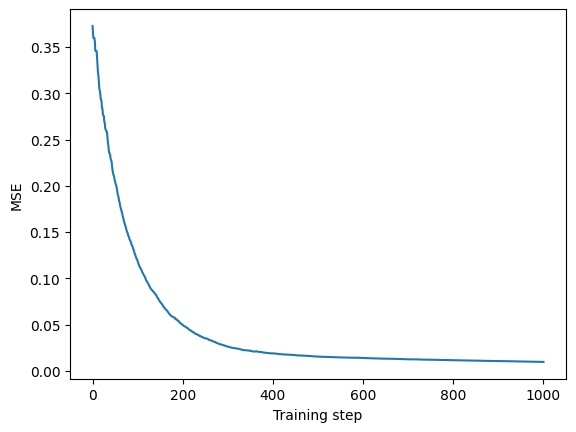

In [12]:

result_sgd = SGD(grad_method=loss_grad, X=X, y=y, beta0=beta0, n_epochs=100, batch_size=10, test_loss_func=loss_func, lr=0.01, gamma=0.0)

loss_list = result_sgd["loss_list"]


plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

### Adagrad

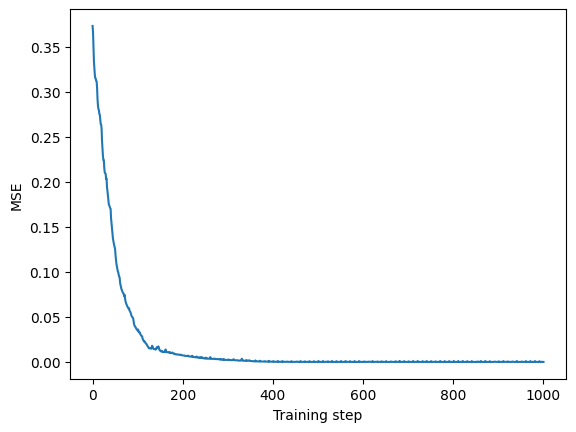

In [13]:

result_adagrad = SGD_adagrad(grad_method=loss_grad, X=X, y=y, beta0=beta0, n_epochs=100, batch_size=10, test_loss_func=loss_func, lr=0.01, gamma=0.0)

loss_list = result_adagrad["loss_list"]


plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

### RMS prop

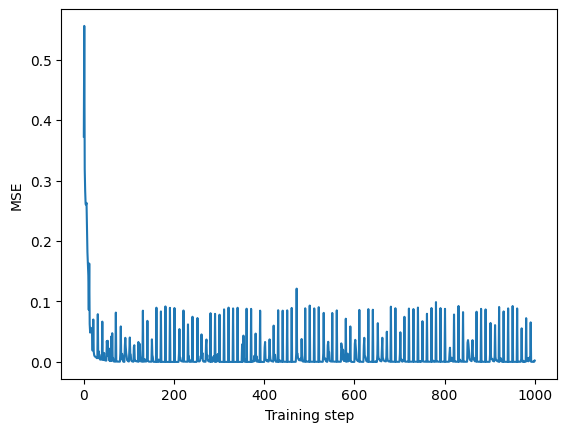

In [14]:

result_rms = SGD_RMS_prop(grad_method=loss_grad, X=X, y=y, beta0=beta0, n_epochs=100, batch_size=10, test_loss_func=loss_func, lr=0.01, gamma=0.0)

loss_list = result_rms["loss_list"]

plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()

### Adam

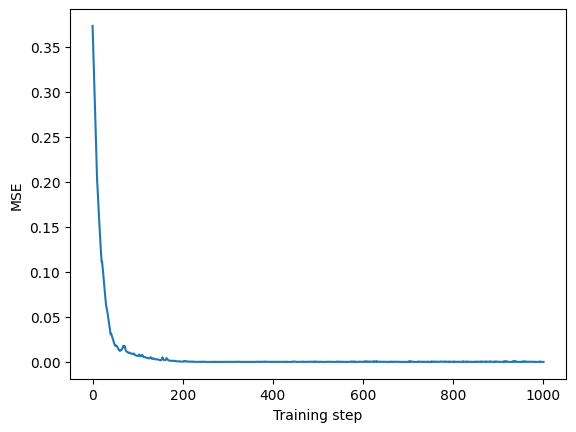

In [15]:


result_adam = SGD_adam(grad_method=loss_grad, X=X, y=y, beta0=beta0, n_epochs=100, batch_size=10, test_loss_func=loss_func, lr=0.01, gamma=0.0)

loss_list = result_adam["loss_list"]

plt.plot(loss_list)
plt.xlabel("Training step")
plt.ylabel("MSE")
plt.show()